In [106]:
import numpy as np
import scipy.linalg as la
from scipy import sparse
from matplotlib import pyplot as plt

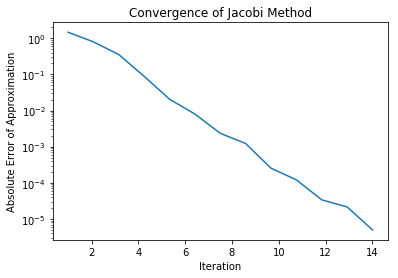

(array([ 0.42172666,  0.89449848,  0.36267661,  0.26551362,  0.29587916,
       -0.23711357,  0.25049752,  0.09451623,  0.21771976,  0.64194174]), 13)


In [107]:
""" Problem 1, 2 """

def jacobi(A, b, tol = 1e-5, maxiters = 50, plot = False):

    D = np.diag(A)
    abserr = np.zeros(int(maxiters))
    iternum = 0
    x0 = np.ones_like(b)
    x1 = x0.copy()
    error = 10
    while error > tol and iternum < maxiters:
        x1 = x0 + (b - A@x0) / D
        error = max(np.abs(x1 - x0))
        abserr[iternum] = error
        x0 = x1.copy()
        iternum +=1
        
    if plot == True:
        plt.semilogy(np.linspace(1,iternum+1,iternum), abserr[:iternum])
        plt.title('Convergence of Jacobi Method')
        plt.xlabel("Iteration")
        plt.ylabel("Absolute Error of Approximation")
        plt.show()
    
    return x0, iternum

def diag_dom(n, num_entries=None):
    if num_entries is None:
        num_entries = int(n**1.5) - n
    A = np.zeros((n,n))
    rows = np.random.choice(np.arange(0,n), size=num_entries)
    cols = np.random.choice(np.arange(0,n), size=num_entries)
    data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
        A[rows[i], cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.sum(np.abs(A[i])) + 1
    return A

n = 10
b = np.random.random(n)
A = diag_dom(n)
print(jacobi(A, b, plot = True))

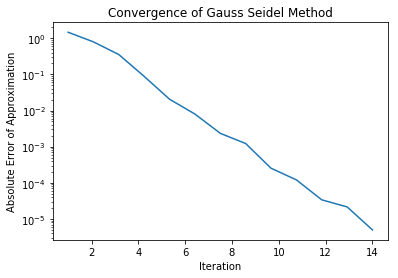

(array([ 0.42172666,  0.89449848,  0.36267661,  0.26551362,  0.29587916,
       -0.23711357,  0.25049752,  0.09451623,  0.21771976,  0.64194174]), 13)


In [108]:
""" Problem 3 """

def gauss_seidel(A, b, tol = 1e-5, maxiters = 50, plot=False):
    
    abserr = np.zeros(int(maxiters))
    iternum = 0
    x0 = np.ones_like(b)
    error = 10
    while error > tol and iternum < maxiters:
        x1 = x0.copy()
        for i in range(len(np.diag(A))): 
            x1[i] = x0[i] + (b[i] - A[i,:].T @ x0)/A[i,i]
        error = np.max(np.abs(x1 - x0))
        abserr[iternum] = error
        x0 = x1.copy()
        iternum +=1
        
    if plot == True:
        plt.semilogy(np.linspace(1,iternum+1,iternum), abserr[:iternum])
        plt.title('Convergence of Gauss Seidel Method')
        plt.xlabel("Iteration")
        plt.ylabel("Absolute Error of Approximation")
        plt.show()
    
    return x0, iternum

print(gauss_seidel(A, b, plot=True))

In [197]:
""" Problem 4 ,5  """

def sparse_matrix(A, b, w = 1, tol = 1e-5, maxiters = 100):
    iternum = 0
    x0 = np.zeros_like(b)
    x1 = np.zeros_like(b)
    error = 1
    while error > tol and iternum < maxiters:
        x0 = np.copy(x1)
        for i in range(len(b)):
            rowstart = A.indptr[i]
            rowend = A.indptr[i + 1]
            Aix = A.data[rowstart:rowend] @ x0[A.indices[rowstart:rowend]]
            x1[i] = x0[i] + (b[i] - Aix) / A[i,i] * w
        error = max(np.abs(x1 - x0))
        iternum +=1 
    return x1, iternum

n =  10
A = sparse.csr_matrix(diag_dom(n))
b = np.random.random(n)
print(sparse_matrix(A,b))  

(array([ 0.23856081,  0.14005682,  0.22794508,  0.10702771,  0.27978171,
        0.19977197,  0.30298464,  0.09373247,  0.01150491,  0.00806363]), 25)


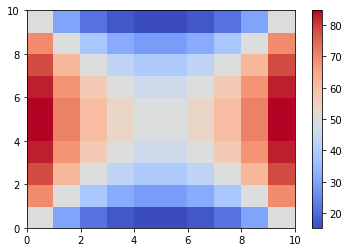

475


In [198]:
""" Problem 6 """

def finite_diff(n, w, tol = 1e-8, maxiters = 1000, plot = False):
    B = sparse.diags([1,-4,1],[-1,0,1],shape=(n,n))
    diagonalsB = np.repeat(B,n)
    diag1 = np.ones(n**2 - n)
    A = sparse.block_diag(diagonalsB) + sparse.diags([diag1,diag1], [-n,n])
    b = np.zeros(n)
    b[0] = -100
    b[-1] = -100
    b = np.tile(b,n)
    u, iternum = sparse_matrix(A, b, w = w, tol = tol, maxiters = maxiters)
    if plot == True:
        un = np.reshape(u,(n,n))
        xvals = np.linspace(0,n,n+1)
        plt.pcolormesh(xvals, xvals, un, cmap = "coolwarm")
        plt.colorbar()
        plt.show() 
    return iternum

print(finite_diff(10, 1, plot = True))

/Users/Deehrlich/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


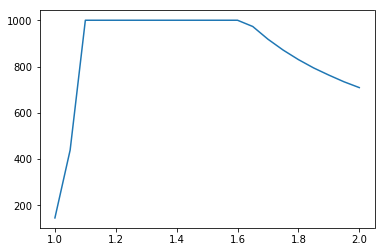

' This final graph does not seem right. 1000 itterations is probbaly too many and one would expect \nthat the number of itterations is '

In [201]:
""" Problem 7 """

def omega_conv():
    wvec = np.linspace(1,2,21)
    results = np.zeros_like(wvec)
    for i in range(len(wvec)):
        results[i] = finite_diff(5, wvec[i])
    plt.plot(wvec, results)
    plt.show()
omega_conv()

""" This final graph does not seem right. 1000 itterations is probbaly too many and one would expect 
that the number of itterations is monotonically increasing rather than decreasing."""